In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from scipy.stats import chi2_contingency
from sklearn.ensemble import RandomForestClassifier



In [75]:
df = pd.read_csv("/content/drive/MyDrive/DataWareHouse/incident_event_log.csv")


In [76]:
df.head()

number incident_state  active  reassignment_count  reopen_count  \
0  INC0000045            New    True                   0             0   
1  INC0000045       Resolved    True                   0             0   
2  INC0000045       Resolved    True                   0             0   
3  INC0000045         Closed   False                   0             0   
4  INC0000047            New    True                   0             0   

   sys_mod_count  made_sla    caller_id       opened_by        opened_at  ...  \
0              0      True  Caller 2403    Opened by  8  29/2/2016 01:16  ...   
1              2      True  Caller 2403    Opened by  8  29/2/2016 01:16  ...   
2              3      True  Caller 2403    Opened by  8  29/2/2016 01:16  ...   
3              4      True  Caller 2403    Opened by  8  29/2/2016 01:16  ...   
4              0      True  Caller 2403  Opened by  397  29/2/2016 04:40  ...   

  u_priority_confirmation         notify problem_id rfc vendor caused_by  \
0                   False  Do Not Notify          ?   ?      ?         ?   
1                   False  Do Not Notify          ?   ?      ?         ?   
2                   False  Do Not Notify          ?   ?      ?         ?   
3                   False  Do Not Notify          ?   ?      ?         ?   
4                   False  Do Not Notify          ?   ?      ?         ?   

  closed_code      resolved_by      resolved_at       closed_at  
0      code 5  Resolved by 149  29/2/2016 11:29  5/3/2016 12:00  
1      code 5  Resolved by 149  29/2/2016 11:29  5/3/2016 12:00  
2      code 5  Resolved by 149  29/2/2016 11:29  5/3/2016 12:00  
3      code 5  Resolved by 149  29/2/2016 11:29  5/3/2016 12:00  
4      code 5   Resolved by 81   1/3/2016 09:52  6/3/2016 10:00  

[5 rows x 36 columns]

In [77]:
df.head().T

0                1                2  \
number                        INC0000045       INC0000045       INC0000045   
incident_state                       New         Resolved         Resolved   
active                              True             True             True   
reassignment_count                     0                0                0   
reopen_count                           0                0                0   
sys_mod_count                          0                2                3   
made_sla                            True             True             True   
caller_id                    Caller 2403      Caller 2403      Caller 2403   
opened_by                   Opened by  8     Opened by  8     Opened by  8   
opened_at                29/2/2016 01:16  29/2/2016 01:16  29/2/2016 01:16   
sys_created_by              Created by 6     Created by 6     Created by 6   
sys_created_at           29/2/2016 01:23  29/2/2016 01:23  29/2/2016 01:23   
sys_updated_by             Updated by 21   Updated by 642   Updated by 804   
sys_updated_at           29/2/2016 01:23  29/2/2016 08:53  29/2/2016 11:29   
contact_type                       Phone            Phone            Phone   
location                    Location 143     Location 143     Location 143   
category                     Category 55      Category 55      Category 55   
subcategory              Subcategory 170  Subcategory 170  Subcategory 170   
u_symptom                     Symptom 72       Symptom 72       Symptom 72   
cmdb_ci                                ?                ?                ?   
impact                        2 - Medium       2 - Medium       2 - Medium   
urgency                       2 - Medium       2 - Medium       2 - Medium   
priority                    3 - Moderate     3 - Moderate     3 - Moderate   
assignment_group                Group 56         Group 56         Group 56   
assigned_to                            ?                ?                ?   
knowledge                           True             True             True   
u_priority_confirmation            False            False            False   
notify                     Do Not Notify    Do Not Notify    Do Not Notify   
problem_id                             ?                ?                ?   
rfc                                    ?                ?                ?   
vendor                                 ?                ?                ?   
caused_by                              ?                ?                ?   
closed_code                       code 5           code 5           code 5   
resolved_by              Resolved by 149  Resolved by 149  Resolved by 149   
resolved_at              29/2/2016 11:29  29/2/2016 11:29  29/2/2016 11:29   
closed_at                 5/3/2016 12:00   5/3/2016 12:00   5/3/2016 12:00   

                                       3                4  
number                        INC0000045       INC0000047  
incident_state                    Closed              New  
active                             False             True  
reassignment_count                     0                0  
reopen_count                           0                0  
sys_mod_count                          4                0  
made_sla                            True             True  
caller_id                    Caller 2403      Caller 2403  
opened_by                   Opened by  8   Opened by  397  
opened_at                29/2/2016 01:16  29/2/2016 04:40  
sys_created_by              Created by 6   Created by 171  
sys_created_at           29/2/2016 01:23  29/2/2016 04:57  
sys_updated_by            Updated by 908   Updated by 746  
sys_updated_at            5/3/2016 12:00  29/2/2016 04:57  
contact_type                       Phone            Phone  
location                    Location 143     Location 165  
category                     Category 55      Category 40  
subcategory              Subcategory 170  Subcategory 215  
u_symptom   

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119998 entries, 0 to 119997
Data columns (total 36 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   number                   119998 non-null  object
 1   incident_state           119998 non-null  object
 2   active                   119998 non-null  bool  
 3   reassignment_count       119998 non-null  int64 
 4   reopen_count             119998 non-null  int64 
 5   sys_mod_count            119998 non-null  int64 
 6   made_sla                 119998 non-null  bool  
 7   caller_id                119998 non-null  object
 8   opened_by                119998 non-null  object
 9   opened_at                119998 non-null  object
 10  sys_created_by           119998 non-null  object
 11  sys_created_at           119998 non-null  object
 12  sys_updated_by           119998 non-null  object
 13  sys_updated_at           119998 non-null  object
 14  contact_type        

In [79]:
df.isna().sum()

number                     0
incident_state             0
active                     0
reassignment_count         0
reopen_count               0
sys_mod_count              0
made_sla                   0
caller_id                  0
opened_by                  0
opened_at                  0
sys_created_by             0
sys_created_at             0
sys_updated_by             0
sys_updated_at             0
contact_type               0
location                   0
category                   0
subcategory                0
u_symptom                  0
cmdb_ci                    0
impact                     0
urgency                    0
priority                   0
assignment_group           0
assigned_to                0
knowledge                  0
u_priority_confirmation    0
notify                     0
problem_id                 0
rfc                        0
vendor                     0
caused_by                  0
closed_code                0
resolved_by                0
resolved_at   

In [80]:
df.describe()

reassignment_count   reopen_count  sys_mod_count
count       119998.000000  119998.000000  119998.000000
mean             1.151236       0.021025       5.199312
std              1.782823       0.196173       7.804628
min              0.000000       0.000000       0.000000
25%              0.000000       0.000000       1.000000
50%              1.000000       0.000000       3.000000
75%              2.000000       0.000000       7.000000
max             27.000000       8.000000     129.000000

In [81]:
df.describe(include = 'object')

number incident_state    caller_id      opened_by  \
count       119998         119998       119998         119998   
unique       20769              9         4829            157   
top     INC0019396         Active  Caller 1904  Opened by  17   
freq            58          33582         1421          33079   

              opened_at sys_created_by sys_created_at  sys_updated_by  \
count            119998         119998         119998          119998   
unique            16349            150           9980             714   
top     14/4/2016 20:42              ?              ?  Updated by 908   
freq                 58          42354          42354           29625   

         sys_updated_at contact_type  ... assigned_to         notify  \
count            119998       119998  ...      119998         119998   
unique            41969            2  ...         209              2   
top     24/3/2016 18:40        Phone  ...           ?  Do Not Notify   
freq                420       119879  ...       23030         119879   

       problem_id     rfc  vendor caused_by closed_code     resolved_by  \
count      119998  119998  119998    119998      119998          119998   
unique        216     163       5         3          17             191   
top             ?       ?       ?         ?      code 6  Resolved by 15   
freq       118061  119116  119816    119980       74039           14398   

       resolved_at        closed_at  
count       119998           119998  
unique       15333             2013  
top              ?  24/3/2016 18:59  
freq          2861             3324  

[4 rows x 29 columns]

# Data Cleaning

In [82]:
# List of date columns
date_columns = ['opened_at', 'sys_created_at', 'sys_updated_at', 'resolved_at', 'closed_at']

df[date_columns] = df[date_columns].apply(pd.to_datetime, errors='coerce')

In [83]:
df[date_columns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119998 entries, 0 to 119997
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   opened_at       119998 non-null  datetime64[ns]
 1   sys_created_at  77644 non-null   datetime64[ns]
 2   sys_updated_at  119998 non-null  datetime64[ns]
 3   resolved_at     117137 non-null  datetime64[ns]
 4   closed_at       119998 non-null  datetime64[ns]
dtypes: datetime64[ns](5)
memory usage: 4.6 MB


In [84]:
# Forward fill missing values in date columns
df[date_columns] = df[date_columns].ffill()

In [85]:
df['vendor'].value_counts()

?           119816
code 8s        137
Vendor 1        39
Vendor 3         4
Vendor 2         2
Name: vendor, dtype: int64

In [86]:
# List of columns to drop becouse they too many "?" value inside them
columns_to_drop = ['problem_id', 'rfc', 'vendor', 'caused_by','cmdb_ci','sys_created_by']

# Drop the columns
df = df.drop(columns=columns_to_drop)

In [87]:
# clearning columns
df = df[(df['assignment_group'] != '?') & (df['assigned_to'] != '?') & (df['location'] != '?')&
            (df['caller_id'] != '?') & (df['caller_id'] != '?')]

In [88]:
# Extract numeric part  and convert to integer
df['opened_by'] = df['opened_by'].str.extract('(\d+)').astype('Int64')
df['sys_updated_by'] = df['sys_updated_by'].str.extract('(\d+)').astype('Int64')
df['location'] = df['location'].str.extract('(\d+)').astype('Int64')
df['category'] = df['category'].str.extract('(\d+)').astype('Int64')
df['subcategory'] = df['subcategory'].str.extract('(\d+)').astype('Int64')
df['assignment_group'] = df['assignment_group'].str.extract('(\d+)').astype('Int64')
df['assigned_to'] = df['assigned_to'].str.extract('(\d+)').astype('Int64')
df['closed_code'] = df['closed_code'].str.extract('(\d+)').astype('Int64')
df['resolved_by'] = df['resolved_by'].str.extract('(\d+)').astype('Int64')
df['number'] = df['number'].str.extract('(\d+)').astype('Int64')

# Convert "caller_id" column to numeric, replacing non-numeric values with NaN
df['caller_id'] = pd.to_numeric(df['caller_id'].str.replace('Caller ', ''), errors='coerce').astype('Int64')

# Remove rows with incident_state equal to '-100'
df = df[df['incident_state'] != '-100']



In [89]:
# Drop rows with missing values
df = df.dropna()

In [90]:
df.reset_index(drop=True, inplace=True)

In [91]:
df.head()

number incident_state  active  reassignment_count  reopen_count  \
0      47            New    True                   0             0   
1      47         Active    True                   1             0   
2      47         Active    True                   1             0   
3      47         Active    True                   1             0   
4      47         Active    True                   1             0   

   sys_mod_count  made_sla  caller_id  opened_by           opened_at  ...  \
0              0      True       2403        397 2016-02-29 04:40:00  ...   
1              1      True       2403        397 2016-02-29 04:40:00  ...   
2              2      True       2403        397 2016-02-29 04:40:00  ...   
3              3      True       2403        397 2016-02-29 04:40:00  ...   
4              4      True       2403        397 2016-02-29 04:40:00  ...   

       priority  assignment_group assigned_to knowledge  \
0  3 - Moderate                70          89      True   
1  3 - Moderate                24          31      True   
2  3 - Moderate                24          31      True   
3  3 - Moderate                24          31      True   
4  3 - Moderate                24          31      True   

   u_priority_confirmation         notify  closed_code resolved_by  \
0                    False  Do Not Notify            5          81   
1                    False  Do Not Notify            5          81   
2                    False  Do Not Notify            5          81   
3                    False  Do Not Notify            5          81   
4                    False  Do Not Notify            5          81   

          resolved_at           closed_at  
0 2016-01-03 09:52:00 2016-06-03 10:00:00  
1 2016-01-03 09:52:00 2016-06-03 10:00:00  
2 2016-01-03 09:52:00 2016-06-03 10:00:00  
3 2016-01-03 09:52:00 2016-06-03 10:00:00  
4 2016-01-03 09:52:00 2016-06-03 10:00:00  

[5 rows x 30 columns]

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82286 entries, 0 to 82285
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   number                   82286 non-null  Int64         
 1   incident_state           82286 non-null  object        
 2   active                   82286 non-null  bool          
 3   reassignment_count       82286 non-null  int64         
 4   reopen_count             82286 non-null  int64         
 5   sys_mod_count            82286 non-null  int64         
 6   made_sla                 82286 non-null  bool          
 7   caller_id                82286 non-null  Int64         
 8   opened_by                82286 non-null  Int64         
 9   opened_at                82286 non-null  datetime64[ns]
 10  sys_created_at           82286 non-null  datetime64[ns]
 11  sys_updated_by           82286 non-null  Int64         
 12  sys_updated_at           82286 n

# EDA

In [93]:
top_categories = df['category'].value_counts().head(10)

# Use Plotly Express to create a pie chart
fig = px.pie(top_categories,
             values='category',
             names=top_categories.index,
             title='Top 10 Categories of Incidents',
             labels={'index': 'Category', 'category': 'Count'},
             )

fig.update_traces(textposition='inside', textinfo='percent+label')

fig.show()


In [94]:
# Overview of Incident States
incident_state_counts = df['incident_state'].value_counts().reset_index()
incident_state_counts.columns = ['Incident State', 'Count']

fig1 = px.bar(incident_state_counts, x='Incident State', y='Count',
              title='Distribution of Incident States',
              labels={'Incident State': 'Incident State', 'Count': 'Count'})
fig1.show()

In [95]:
#  Destribution of Incident Priority Levels
priority_counts = df['priority'].value_counts().reset_index()
priority_counts.columns = ['Priority Level', 'Count']

fig_priority = px.pie(priority_counts, values='Count', names='Priority Level',
                      title='Distribution of Incident Priority Levels',
                      labels={'Priority Level': 'Priority Level', 'Count': 'Count'})
fig_priority.show()

In [96]:
# Distribution of Incident Impact

impact_counts = df['impact'].value_counts().reset_index()
impact_counts.columns = ['Impact Level', 'Count']



fig_impact = px.bar(impact_counts, x='Impact Level', y='Count',
                    title='Distribution of Incident Impact Levels',
                    labels={'Impact Level': 'Impact Level', 'Count': 'Count'})


fig_impact.show()


In [97]:
# Distribution of Incident Urgency

urgency_counts = df['urgency'].value_counts().reset_index()
urgency_counts.columns = ['Urgency Level', 'Count']


fig_urgency = px.bar(urgency_counts, x='Urgency Level', y='Count',
                     title='Distribution of Incident Urgency Levels',
                     labels={'Urgency Level': 'Urgency Level', 'Count': 'Count'})


fig_urgency.show()


In [98]:
# Time Distribution

time_distribution = df.groupby(df['opened_at'].dt.date)['number'].count().reset_index()
time_distribution.columns = ['Date', 'Incident Count']

fig_time_distribution = px.line(time_distribution, x='Date', y='Incident Count',
                                title='Time Distribution of Incidents',
                                labels={'Date': 'Date', 'Incident Count': 'Incident Count'})

fig_time_distribution.show()


In [99]:
# Distribution of Active/Inactive Incidents

active_counts = df['active'].value_counts().reset_index()
active_counts.columns = ['Active', 'Count']

fig_active = px.pie(active_counts, values='Count', names='Active',
                    title='Distribution of Active/Inactive Incidents',
                    labels={'Active': 'Active', 'Count': 'Count'})

fig_active.show()

In [100]:
# Distribution of Incident Knowledge

knowledge_counts = df['knowledge'].value_counts().reset_index()
knowledge_counts.columns = ['Knowledge', 'Count']

fig_knowledge = px.pie(knowledge_counts, values='Count', names='Knowledge',
                       title='Distribution of Incident Knowledge',
                       labels={'Knowledge': 'Knowledge', 'Count': 'Count'})

fig_knowledge.show()


In [101]:
# Distribution of Assignment Groups
assignment_group_counts = df['assignment_group'].value_counts().reset_index()
assignment_group_counts.columns = ['Assignment Group', 'Count']

# Create pie plot
fig_assignment_group = px.pie(assignment_group_counts.head(20), values='Count', names='Assignment Group',
                              title='Top 20 Assignment Groups')

fig_assignment_group.show()

In [102]:
# Distribution of Opened By
opened_by_counts = df['opened_by'].value_counts().reset_index()
opened_by_counts.columns = ['Opened By', 'Count']

# Create pie plot
fig_opened_by = px.pie(opened_by_counts.head(20), values='Count', names='Opened By',
                       title='Top 20 Opened By')

fig_opened_by.show()

In [103]:
# Distribution of Resolved By
resolved_by_counts = df['resolved_by'].value_counts().reset_index()
resolved_by_counts.columns = ['Resolved By', 'Count']

# Create pie plot
fig_resolved_by = px.pie(resolved_by_counts.head(20), values='Count', names='Resolved By',
                         title='Top 20 Resolved By')

fig_resolved_by.show()


In [104]:
# Distribution of Notification Preferences
notify_counts = df['notify'].value_counts().reset_index()
notify_counts.columns = ['Notification Preference', 'Count']

fig_notify = px.pie(notify_counts, names='Notification Preference', values='Count',
                    title='Notification Preference Distribution',
                    labels={'Notification Preference': 'Notification Preference', 'Count': 'Count'})

fig_notify.show()

In [105]:
# Distribution of Incident Resolutions
resolved_counts = df['incident_state'].value_counts().reset_index()
resolved_counts.columns = ['Incident Resolution', 'Count']

fig_resolved = px.bar(resolved_counts, x='Incident Resolution', y='Count',
                      title='Distribution of Incident Resolutions',
                      labels={'Incident Resolution': 'Incident Resolution', 'Count': 'Count'})

fig_resolved.show()

In [106]:
#  Distribution of Impact Levels
impact_counts = df['impact'].value_counts().reset_index()
impact_counts.columns = ['Impact Level', 'Count']

fig_impact = px.bar(impact_counts, x='Impact Level', y='Count',
                    title='Distribution of Impact Levels',
                    labels={'Impact Level': 'Impact Level', 'Count': 'Count'})

fig_impact.show()

In [107]:
# Distribution of Incident Reassignments
reassignment_counts = df['reassignment_count'].value_counts().nlargest(15).reset_index()
reassignment_counts.columns = ['Reassignment Count', 'Count']

fig_reassignment = px.bar(reassignment_counts, x='Reassignment Count', y='Count',
                           title='Distribution of Incident Reassignments',
                           labels={'Reassignment Count': 'Reassignment Count', 'Count': 'Count'})

fig_reassignment.show()

In [108]:
resolved_counts = df['incident_state'].apply(lambda x: 'Resolved' if x == 'Resolved' else 'Not Resolved').value_counts().reset_index()
resolved_counts.columns = ['Resolution Status', 'Count']

fig_resolved = px.pie(resolved_counts, names='Resolution Status', values='Count',
                      title='Distribution of Incident Resolutions',
                      labels={'Resolution Status': 'Resolution Status', 'Count': 'Count'})

fig_resolved.show()

In [109]:
# Distribution of Incident Lifecycle (Active/Closed)

active_closed_counts = df['active'].value_counts().reset_index()
active_closed_counts.columns = ['Incident Lifecycle', 'Count']

fig_lifecycle = px.pie(active_closed_counts, names='Incident Lifecycle', values='Count',
                       title='Distribution of Incident Lifecycle (Active/Closed)',
                       labels={'Incident Lifecycle': 'Incident Lifecycle', 'Count': 'Count'})

fig_lifecycle.show()

In [110]:
# Distribution of Incident Categories
category_counts = df['category'].value_counts().reset_index().head(10)
category_counts.columns = ['Category', 'Count']

# Create pie plot
fig_category_distribution = px.pie(category_counts, values='Count', names='Category',
                                   title='Top 10 Incident Categories Distribution')

fig_category_distribution.show()


In [111]:
priority_counts = df['priority'].value_counts().reset_index()
priority_counts.columns = ['Priority Level', 'Count']

fig_priority_distribution = px.pie(priority_counts, names='Priority Level', values='Count',
                                   title='Distribution of Incident Priority Levels',
                                   labels={'Priority Level': 'Priority Level', 'Count': 'Count'})

fig_priority_distribution.show()

In [112]:
# Time Series Plot of Incident States

state_counts = df['incident_state'].value_counts().reset_index()
state_counts.columns = ['State', 'Count']

fig_states = px.line(state_counts, x='State', y='Count',
                     title='Incident Lifecycle Analysis - Time Series Plot',
                     labels={'State': 'Incident State', 'Count': 'Count'})

fig_states.show()

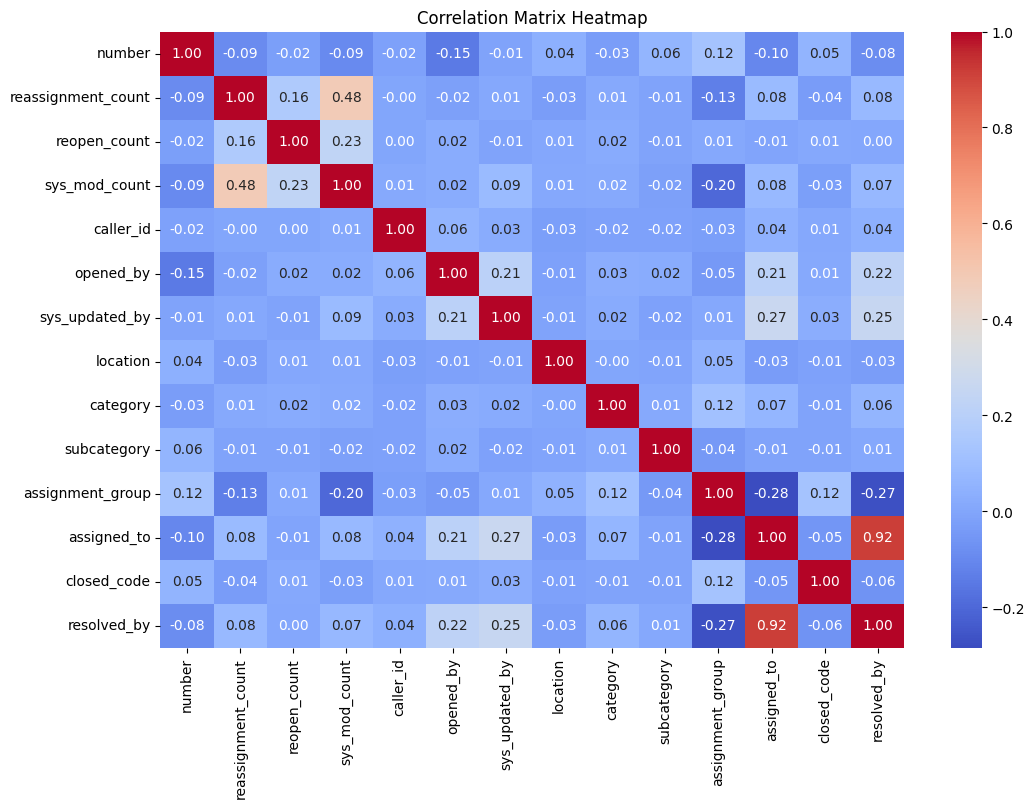

In [113]:
# Correlation Matrix Heatmap
numeric_columns = df.select_dtypes(include='number').columns
correlation_matrix = df[numeric_columns].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

In [114]:
# Priority Sunburst Chart
priority_sunburst = df.groupby(['category', 'priority']).size().reset_index(name='count')
fig = px.sunburst(priority_sunburst, path=[ 'category', 'priority'], values='count',
                  title='Priority Sunburst Chart')
fig.show()

In [115]:
fig = px.histogram(df, x='urgency', color='impact',
                   title='Incident Count by Urgency and Impact',
                   labels={'count': 'Incident Count'},
                   height=600, width=800)
fig.show()

In [116]:
fig = px.sunburst(df, path=['incident_state', 'priority', 'category'],
                  title='Incident State Distribution Sunburst Chart',
                  labels={'value': 'Incident Count'},
                  height=600)
fig.show()

In [117]:
fig = px.histogram(df, x='category', color='priority',
                   title='Priority Distribution by Category',
                   labels={'count': 'Incident Count'},
                   height=600, width=800)
fig.show()

In [118]:
fig = px.histogram(df, x='impact', color='priority',
                   title='Priority Distribution by Impact',
                   labels={'count': 'Incident Count'},
                   height=600, width=800)
fig.show()

In [119]:
fig = px.sunburst(df, path=['incident_state', 'priority', 'location'],
                  title='Incident State Distribution Sunburst Chart by Location',
                  labels={'value': 'Incident Count'},
                  height=600)
fig.show()

In [120]:
fig = px.histogram(df, x='incident_state', color='category',
                   title='Incident State Distribution by Category',
                   labels={'count': 'Incident Count'},
                   height=600, width=800)
fig.show()

In [121]:
fig = px.treemap(df, path=['incident_state', 'subcategory'],
                 title='Incident State Distribution Treemap by Subcategory',
                 height=600, width=800)
fig.show()

In [122]:
fig = px.sunburst(df, path=['assignment_group', 'impact', 'incident_state'],
                  title='Incident State Distribution by Assignment Group and Impact',
                  labels={'value': 'Incident Count'},
                  height=600)
fig.show()

In [123]:
fig = px.sunburst(df, path=['assignment_group', 'location', 'priority'],
                  title='Incident Priority Sunburst Chart by Assignment Group and Location',
                  labels={'value': 'Incident Count'},
                  height=600)
fig.show()

In [124]:
fig = px.histogram(df, x='reassignment_count', color='priority',
                   title='Distribution of Reassignment Count by Priority',
                   labels={'count': 'Incident Count'},
                   height=600, width=800)
fig.show()

In [125]:
fig = px.sunburst(df, path=['knowledge', 'category', 'incident_state'],
                  title='Incident State Distribution by Knowledge and Category',
                  labels={'value': 'Incident Count'},
                  height=600)
fig.show()

In [126]:
fig = px.sunburst(df, path=['urgency', 'priority', 'incident_state'],
                  title='Incident State Distribution by Urgency and Priority',
                  labels={'value': 'Incident Count'},
                  height=600)
fig.show()


In [127]:
fig = px.histogram(df, x='contact_type', color='priority',
                   title='Incident Priority Distribution by Contact Type',
                   labels={'count': 'Incident Count'},
                   height=600, width=800)
fig.show()

In [128]:
fig = px.sunburst(df, path=['impact', 'urgency', 'incident_state'],
                  title='Incident State Distribution by Impact and Urgency',
                  labels={'value': 'Incident Count'},
                  height=600)
fig.show()

In [129]:
# Analyze distribution of incident resolution times or priority assignment across assignment groups
assignment_group_counts = df['assignment_group'].value_counts()

# Plot distribution using Plotly bar chart
fig = px.bar(assignment_group_counts, x=assignment_group_counts.index, y=assignment_group_counts.values,
             labels={'x': 'Assignment Group', 'y': 'Count'}, title='Distribution of Incidents Across Assignment Groups')
fig.update_layout(xaxis_title='Assignment Group', yaxis_title='Count', xaxis_tickangle=-45)
fig.show()

In [130]:
# Analysis for Impact
impact_counts = df['impact'].value_counts()

# Plotting
fig_impact = px.pie(impact_counts, names=impact_counts.index, values=impact_counts.values,
                    title='Distribution of Incident Impact Levels',
                    hole=0.4)

# Show the plot
fig_impact.show()

# Analysis for Urgency
urgency_counts = df['urgency'].value_counts()

# Plotting
fig_urgency = px.pie(urgency_counts, names=urgency_counts.index, values=urgency_counts.values,
                     title='Distribution of Incident Urgency Levels',
                     hole=0.4)

# Show the plot
fig_urgency.show()


In [131]:
# Analysis for Location
location_counts = df['location'].value_counts()

# Create pie plot
fig_location = px.pie(location_counts.head(20), values=location_counts.head(20).values, names=location_counts.head(20).index,
                      title='Top 20 Locations - Distribution of Incidents')

fig_location.show()


In [132]:
df['resolution_time'] = (df['resolved_at'] - df['opened_at']).dt.total_seconds() / 3600  # in hours
negative_resolution = df[df['resolution_time'] < 0]
negative_resolution.head()

number incident_state  active  reassignment_count  reopen_count  \
0      47            New    True                   0             0   
1      47         Active    True                   1             0   
2      47         Active    True                   1             0   
3      47         Active    True                   1             0   
4      47         Active    True                   1             0   

   sys_mod_count  made_sla  caller_id  opened_by           opened_at  ...  \
0              0      True       2403        397 2016-02-29 04:40:00  ...   
1              1      True       2403        397 2016-02-29 04:40:00  ...   
2              2      True       2403        397 2016-02-29 04:40:00  ...   
3              3      True       2403        397 2016-02-29 04:40:00  ...   
4              4      True       2403        397 2016-02-29 04:40:00  ...   

  assignment_group  assigned_to knowledge u_priority_confirmation  \
0               70           89      True                   False   
1               24           31      True                   False   
2               24           31      True                   False   
3               24           31      True                   False   
4               24           31      True                   False   

          notify  closed_code  resolved_by         resolved_at  \
0  Do Not Notify            5           81 2016-01-03 09:52:00   
1  Do Not Notify            5           81 2016-01-03 09:52:00   
2  Do Not Notify            5           81 2016-01-03 09:52:00   
3  Do Not Notify            5           81 2016-01-03 09:52:00   
4  Do Not Notify            5           81 2016-01-03 09:52:00   

            closed_at resolution_time  
0 2016-06-03 10:00:00         -1362.8  
1 2016-06-03 10:00:00         -1362.8  
2 2016-06-03 10:00:00         -1362.8  
3 2016-06-03 10:00:00         -1362.8  
4 2016-06-03 10:00:00         -1362.8  

[5 rows x 31 columns]

In [133]:
df = df[df['resolved_at'] >= df['opened_at']]
# Reset the index after dropping rows
df.reset_index(drop=True, inplace=True)

In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66957 entries, 0 to 66956
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   number                   66957 non-null  Int64         
 1   incident_state           66957 non-null  object        
 2   active                   66957 non-null  bool          
 3   reassignment_count       66957 non-null  int64         
 4   reopen_count             66957 non-null  int64         
 5   sys_mod_count            66957 non-null  int64         
 6   made_sla                 66957 non-null  bool          
 7   caller_id                66957 non-null  Int64         
 8   opened_by                66957 non-null  Int64         
 9   opened_at                66957 non-null  datetime64[ns]
 10  sys_created_at           66957 non-null  datetime64[ns]
 11  sys_updated_by           66957 non-null  Int64         
 12  sys_updated_at           66957 n

# Fairness Analysis

In [135]:
# Fairness Analysis for Assigned_To

# Group by 'assigned_to' and calculate average resolution time
assigned_to_analysis = df.groupby('assigned_to')['resolution_time'].mean().reset_index()

# Create a fairness plot
fig = px.bar(assigned_to_analysis, x='assigned_to', y='resolution_time',
             labels={'assigned_to': 'Assigned To', 'resolution_time': 'Average Resolution Time'},
             title='Fairness Analysis for Assigned To',
             color='assigned_to', color_continuous_scale='viridis')

fig.show()

In [136]:
# Group by 'category' and calculate average resolution time
category_analysis = df.groupby('category')['resolution_time'].mean().reset_index()

# Create a fairness plot
fig = px.bar(category_analysis, x='category', y='resolution_time',
             labels={'category': 'Category', 'resolution_time': 'Average Resolution Time'},
             title='Fairness Analysis for Category',
             color='category', color_continuous_scale='viridis')

fig.show()


In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66957 entries, 0 to 66956
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   number                   66957 non-null  Int64         
 1   incident_state           66957 non-null  object        
 2   active                   66957 non-null  bool          
 3   reassignment_count       66957 non-null  int64         
 4   reopen_count             66957 non-null  int64         
 5   sys_mod_count            66957 non-null  int64         
 6   made_sla                 66957 non-null  bool          
 7   caller_id                66957 non-null  Int64         
 8   opened_by                66957 non-null  Int64         
 9   opened_at                66957 non-null  datetime64[ns]
 10  sys_created_at           66957 non-null  datetime64[ns]
 11  sys_updated_by           66957 non-null  Int64         
 12  sys_updated_at           66957 n

In [138]:
# Select relevant columns
fairness_columns = ['assigned_to', 'reassignment_count', 'knowledge', 'u_priority_confirmation', 'resolution_time']

# Create a subset DataFrame for fairness analysis
fairness_df = df[fairness_columns].copy()

# Convert 'assigned_to' column to string
fairness_df['assigned_to'] = fairness_df['assigned_to'].astype(str)

# Iterate through each column (except 'assigned_to')
for column in fairness_columns[1:]:
    # Create contingency table for statistical test
    contingency_table = pd.crosstab(fairness_df['assigned_to'], fairness_df[column])

    # Perform chi-square test for independence
    chi2_stat, p_value, _, _ = chi2_contingency(contingency_table)

    # Print results for each column
    print(f"\nChi-Square Test for Independence between 'assigned_to' and '{column}':")
    print(f"Chi-Square Statistic: {chi2_stat}")
    print(f"P-value: {p_value}")

    # Check for significance level (e.g., 0.05)
    if p_value < 0.05:
        print(f"There is significant evidence of a relationship between 'assigned_to' and '{column}'.")
    else:
        print(f"There is no significant evidence of a relationship between 'assigned_to' and '{column}'.")



Chi-Square Test for Independence between 'assigned_to' and 'reassignment_count':
Chi-Square Statistic: 31795.876597087998
P-value: 0.0
There is significant evidence of a relationship between 'assigned_to' and 'reassignment_count'.

Chi-Square Test for Independence between 'assigned_to' and 'knowledge':
Chi-Square Statistic: 9722.680381523722
P-value: 0.0
There is significant evidence of a relationship between 'assigned_to' and 'knowledge'.

Chi-Square Test for Independence between 'assigned_to' and 'u_priority_confirmation':
Chi-Square Statistic: 7433.538315930116
P-value: 0.0
There is significant evidence of a relationship between 'assigned_to' and 'u_priority_confirmation'.

Chi-Square Test for Independence between 'assigned_to' and 'resolution_time':
Chi-Square Statistic: 7708751.266322064
P-value: 0.0
There is significant evidence of a relationship between 'assigned_to' and 'resolution_time'.


In [139]:
# Create a DataFrame for the assignment group distribution
assignment_group_distribution = df['assignment_group'].value_counts(normalize=True)

df_assignment_group_distribution = assignment_group_distribution.reset_index()
df_assignment_group_distribution.columns = ['Assignment Group', 'Proportion']

# Plot the distribution using Plotly
fig = px.bar(df_assignment_group_distribution, x='Assignment Group', y='Proportion',
             title='Distribution of Incidents Across Assignment Groups',
             labels={'Proportion': 'Proportion of Incidents', 'Assignment Group': 'Assignment Group'},
             template='plotly_dark')

# Customize layout
fig.update_layout(xaxis=dict(type='category'), xaxis_title_text='Assignment Group')
fig.show()


In [140]:
# Iterate through each column (except 'assigned_to')

# Select relevant columns
fairness_columns = ['assigned_to', 'reassignment_count', 'knowledge', 'u_priority_confirmation', 'resolution_time']

# Create a subset DataFrame for fairness analysis
fairness_df = df[fairness_columns].copy()


for column in fairness_columns[1:]:
    # Create contingency table for statistical test
    contingency_table = pd.crosstab(fairness_df['assigned_to'], fairness_df[column])

    # Observed frequencies
    observed = np.array(contingency_table)

    # Perform chi-square test for independence
    chi2_stat, p_value, _, _ = chi2_contingency(contingency_table)

    # Calculate expected frequencies
    row_totals = contingency_table.sum(axis=1)
    col_totals = contingency_table.sum(axis=0)
    expected = np.outer(row_totals, col_totals) / df.shape[0]

    # Calculate fairness metric (e.g., Chi-square value)
    fairness_metric = chi2_stat / df.shape[0]

    # Print fairness assessment for each column
    print(f"\nFairness Assessment between 'assigned_to' and '{column}':")
    print(f"Chi-Square Statistic: {chi2_stat}")
    print(f"P-value: {p_value}")
    print(f"Fairness Metric: {fairness_metric}")

    # Check for fairness based on a significance level (e.g., 0.05)
    if p_value < 0.05:
        print(f"There is evidence of potential unfairness between 'assigned_to' and '{column}'.")
    else:
        print(f"There is no evidence of unfairness between 'assigned_to' and '{column}'.")



Fairness Assessment between 'assigned_to' and 'reassignment_count':
Chi-Square Statistic: 31795.876597087998
P-value: 0.0
Fairness Metric: 0.4748700897156085
There is evidence of potential unfairness between 'assigned_to' and 'reassignment_count'.

Fairness Assessment between 'assigned_to' and 'knowledge':
Chi-Square Statistic: 9722.680381523722
P-value: 0.0
Fairness Metric: 0.14520782564218412
There is evidence of potential unfairness between 'assigned_to' and 'knowledge'.

Fairness Assessment between 'assigned_to' and 'u_priority_confirmation':
Chi-Square Statistic: 7433.538315930118
P-value: 0.0
Fairness Metric: 0.11101958444867778
There is evidence of potential unfairness between 'assigned_to' and 'u_priority_confirmation'.

Fairness Assessment between 'assigned_to' and 'resolution_time':
Chi-Square Statistic: 7708751.2663220605
P-value: 0.0
Fairness Metric: 115.12987837450991
There is evidence of potential unfairness between 'assigned_to' and 'resolution_time'.


In [141]:
# Define time periods
time_periods = pd.date_range(start=df['opened_at'].min(), end=df['resolved_at'].max(), freq='M')

# Create a new column indicating the time period for each record
df['time_period'] = pd.cut(df['opened_at'], bins=time_periods)

# Specify fairness columns for analysis
fairness_columns = ['assigned_to', 'reassignment_count', 'knowledge', 'u_priority_confirmation', 'resolution_time']

# Initialize an empty DataFrame to store fairness metrics over time
fairness_over_time = pd.DataFrame(columns=['time_period'] + fairness_columns)

# Loop through each time period
for period in time_periods:
    # Subset data for the current time period
    subset_df = df[df['opened_at'].between(period, period + pd.DateOffset(months=1))]

    # Calculate fairness metrics for each column
    fairness_metrics = []
    for column in fairness_columns:
        # Perform your fairness analysis ( chi-square test, disparity metrics)
        # Add the calculated metric to the list
        fairness_metrics.append(subset_df[column].mean())

    # Append the results to the fairness_over_time DataFrame
    fairness_over_time = pd.concat([fairness_over_time, pd.DataFrame([[period] + fairness_metrics], columns=['time_period'] + fairness_columns)], ignore_index=True)

# Visualize fairness metrics over time
fig = px.line(fairness_over_time, x='time_period', y=fairness_columns, title='Fairness Analysis Over Time')
fig.show()


# Machine Learning

In [142]:
# Calculate mean for assigned_to and reassignment_count
assigned_to_mean = df['assigned_to'].mean()
reassignment_count_mean = df['reassignment_count'].mean()

# Calculate mean for resolution_time
resolution_time_mean = df['resolution_time'].mean()

# specified columns for fairness
fairness_columns = ['assigned_to', 'reassignment_count', 'knowledge', 'u_priority_confirmation', 'resolution_time']

# Define criteria for fairness using mean as thresholds
fairness_thresholds = {
    'assigned_to_threshold': round(assigned_to_mean),  # Use rounded mean
    'reassignment_count_threshold': round(reassignment_count_mean),  # Use rounded mean
    'knowledge_threshold': False,
    'u_priority_confirmation_threshold': False,
    'resolution_time_threshold': resolution_time_mean
}

# Create a binary target variable 'fairness' based on criteria
df['fairness'] = (
    (df['assigned_to'] <= fairness_thresholds['assigned_to_threshold']) &
    (df['reassignment_count'] <= fairness_thresholds['reassignment_count_threshold']) &
    (df['knowledge'] >= fairness_thresholds['knowledge_threshold']) &
    (df['u_priority_confirmation'] >= fairness_thresholds['u_priority_confirmation_threshold']) &
    (df['resolution_time'] <= fairness_thresholds['resolution_time_threshold'])
).astype(int)

# Display the counts of fair and unfair incidents
print("Counts of Fair and Unfair Incidents:")
print(df['fairness'].value_counts())


Counts of Fair and Unfair Incidents:
0    43335
1    23622
Name: fairness, dtype: int64


In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66957 entries, 0 to 66956
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   number                   66957 non-null  Int64         
 1   incident_state           66957 non-null  object        
 2   active                   66957 non-null  bool          
 3   reassignment_count       66957 non-null  int64         
 4   reopen_count             66957 non-null  int64         
 5   sys_mod_count            66957 non-null  int64         
 6   made_sla                 66957 non-null  bool          
 7   caller_id                66957 non-null  Int64         
 8   opened_by                66957 non-null  Int64         
 9   opened_at                66957 non-null  datetime64[ns]
 10  sys_created_at           66957 non-null  datetime64[ns]
 11  sys_updated_by           66957 non-null  Int64         
 12  sys_updated_at           66957 n

In [144]:
df['incident_state'].value_counts()

Active                18127
Resolved              15187
Closed                14814
New                   13022
Awaiting User Info     5216
Awaiting Vendor         344
Awaiting Problem        234
Awaiting Evidence        13
Name: incident_state, dtype: int64

In [145]:
# Select relevant features and target variable
X = df[['reassignment_count', 'knowledge', 'u_priority_confirmation', 'resolution_time',
          'impact', 'urgency', 'priority']]
y = df['fairness']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a ColumnTransformer to handle one-hot encoding
preprocessor = ColumnTransformer(
    transformers=[
        ('priority', OneHotEncoder(), ['priority']),
        ('impact', OneHotEncoder(), ['impact']),
        ('urgency', OneHotEncoder(), ['urgency']),
    ],
    remainder='passthrough'
)

# Create a RandomForestClassifier pipeline
clf = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Train the model
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")


Accuracy: 86.67%


In [146]:
df[['reassignment_count', 'knowledge', 'u_priority_confirmation', 'resolution_time',
          'impact', 'urgency', 'priority','fairness']].tail(20)

reassignment_count  knowledge  u_priority_confirmation  \
66937                   0      False                     True   
66938                   0      False                    False   
66939                   0      False                     True   
66940                   0      False                     True   
66941                   0      False                    False   
66942                   0      False                    False   
66943                   0      False                     True   
66944                   0      False                     True   
66945                   0      False                    False   
66946                   0      False                     True   
66947                   0      False                     True   
66948                   6      False                     True   
66949                   6      False                     True   
66950                   0      False                    False   
66951                   0      False                     True   
66952                   0      False                     True   
66953                   0      False                     True   
66954                   0      False                     True   
66955                   0      False                    False   
66956                   0      False                    False   

       resolution_time      impact     urgency      priority  fairness  
66937       173.166667  2 - Medium  2 - Medium  3 - Moderate         0  
66938         0.350000  2 - Medium  2 - Medium  3 - Moderate         1  
66939         0.350000  2 - Medium  2 - Medium  3 - Moderate         1  
66940         0.350000  2 - Medium  2 - Medium  3 - Moderate         1  
66941        76.450000  2 - Medium  2 - Medium  3 - Moderate         1  
66942        76.450000  2 - Medium  2 - Medium  3 - Moderate         1  
66943        76.450000  2 - Medium  2 - Medium  3 - Moderate         1  
66944        76.450000  2 - Medium  2 - Medium  3 - Moderate         1  
66945         3.500000  2 - Medium  2 - Medium  3 - Moderate         1  
66946         3.500000  2 - Medium  2 - Medium  3 - Moderate         1  
66947         3.500000  2 - Medium  2 - Medium  3 - Moderate         1  
66948       265.216667     3 - Low     3 - Low       4 - Low         0  
66949       265.216667     3 - Low     3 - Low       4 - Low         0  
66950         0.433333  2 - Medium  2 - Medium  3 - Moderate         0  
66951         0.433333  2 - Medium  2 - Medium  3 - Moderate         0  
66952         0.433333  2 - Medium  2 - Medium  3 - Moderate         0  
66953         0.483333  2 - Medium  2 - Medium  3 - Moderate         1  
66954         0.483333  2 - Medium  2 - Medium  3 - Moderate         1  
66955         0.450000  2 - Medium  2 - Medium  3 - Moderate         1  
66956         0.450000  2 - Medium  2 - Medium  3 - Moderate         1